In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
stock_data = yf.download('TATAMOTORS.NS', start='2019-10-01', end='2024-09-16')
stock_data.reset_index(inplace=True)
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-01,118.000000,119.849998,113.000000,115.300003,114.588158,40232789
1,2019-10-03,112.650002,123.500000,112.650002,122.400002,121.644318,65103359
2,2019-10-04,122.800003,123.800003,118.800003,119.650002,118.911293,35712218
3,2019-10-07,120.250000,120.550003,116.349998,117.500000,116.774567,35471184
4,2019-10-09,118.500000,121.699997,115.449997,120.900002,120.153572,44666296


**Exploratory Data Analysis (EDA)**

Check for Missing Values

In [3]:
stock_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [4]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
stock_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1226,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03
mean,2022-03-21 22:53:03.034257920,443.373573,449.015865,436.802895,442.685074,440.721453,3.456868e+07
min,2019-10-01 00:00:00,66.500000,66.900002,63.500000,65.300003,64.896851,2.871205e+06
25%,2020-12-23 06:00:00,192.224998,195.837494,189.437500,193.337498,192.143852,1.146388e+07
50%,2022-03-21 12:00:00,421.000000,425.050003,414.725006,419.850006,417.257889,2.041147e+07
75%,2023-06-14 18:00:00,567.525009,571.950012,560.725006,567.399979,563.896896,4.624247e+07
max,2024-09-13 00:00:00,1167.000000,1179.000000,1145.300049,1161.849976,1161.849976,3.905778e+08
std,NaN,271.828509,273.993559,268.550162,271.224203,270.912480,3.736216e+07


**Visualize Stock Price Trends**

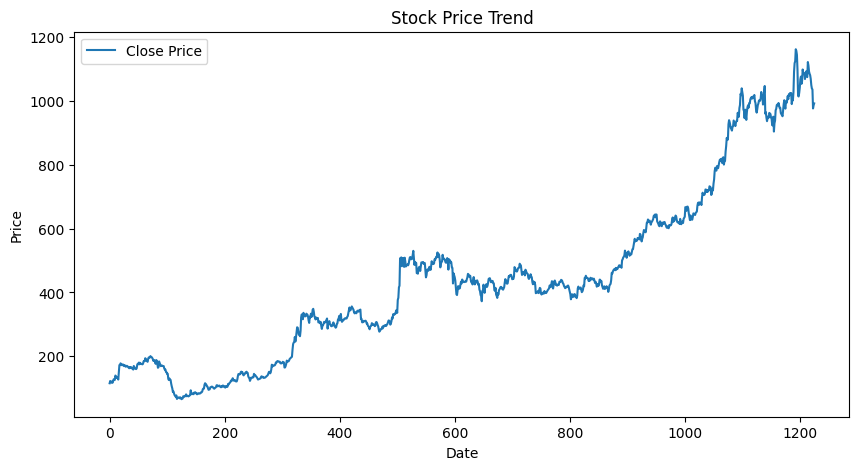

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.title('Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Analyze Trading Volume

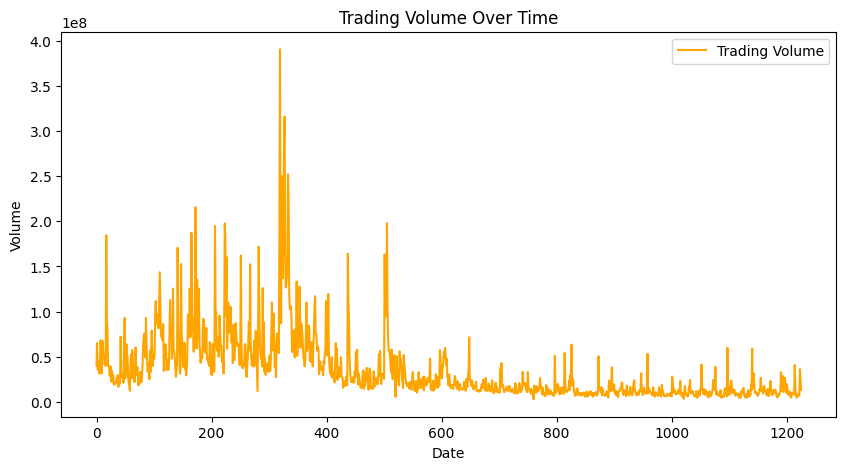

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, stock_data['Volume'], label='Trading Volume', color='orange')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [8]:
stock_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1226,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03
mean,2022-03-21 22:53:03.034257920,443.373573,449.015865,436.802895,442.685074,440.721453,3.456868e+07
min,2019-10-01 00:00:00,66.500000,66.900002,63.500000,65.300003,64.896851,2.871205e+06
25%,2020-12-23 06:00:00,192.224998,195.837494,189.437500,193.337498,192.143852,1.146388e+07
50%,2022-03-21 12:00:00,421.000000,425.050003,414.725006,419.850006,417.257889,2.041147e+07
75%,2023-06-14 18:00:00,567.525009,571.950012,560.725006,567.399979,563.896896,4.624247e+07
max,2024-09-13 00:00:00,1167.000000,1179.000000,1145.300049,1161.849976,1161.849976,3.905778e+08
std,NaN,271.828509,273.993559,268.550162,271.224203,270.912480,3.736216e+07


**Statistical Analysis**

In [9]:
stock_data['Returns'] = stock_data['Close'].pct_change()

In [10]:
stock_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
count,1226,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1225.000000
mean,2022-03-21 22:53:03.034257920,443.373573,449.015865,436.802895,442.685074,440.721453,3.456868e+07,0.002150
min,2019-10-01 00:00:00,66.500000,66.900002,63.500000,65.300003,64.896851,2.871205e+06,-0.143596
25%,2020-12-23 06:00:00,192.224998,195.837494,189.437500,193.337498,192.143852,1.146388e+07,-0.010855
50%,2022-03-21 12:00:00,421.000000,425.050003,414.725006,419.850006,417.257889,2.041147e+07,0.001231
75%,2023-06-14 18:00:00,567.525009,571.950012,560.725006,567.399979,563.896896,4.624247e+07,0.013693
max,2024-09-13 00:00:00,1167.000000,1179.000000,1145.300049,1161.849976,1161.849976,3.905778e+08,0.204467
std,NaN,271.828509,273.993559,268.550162,271.224203,270.912480,3.736216e+07,0.028211


In [11]:
period1 = stock_data.loc['2019-10-01':'2022-04-17']['Returns'].dropna()
period2 = stock_data.loc['2022-04-18':'2024-09-16']['Returns'].dropna()

In [12]:
t_stat, p_value = stats.ttest_ind(period1, period2)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: nan, p-value: nan


**INTERPRETATION**

Since the p-value is 0.480 (much higher than 0.05), you fail to reject the null hypothesis. This means there is no statistically significant difference between the means of period1 and period2.

In [13]:
correlation = stock_data['Close'].corr(stock_data['Volume'])
print(f'Correlation between Stock Price and Volume: {correlation}')

Correlation between Stock Price and Volume: -0.48600811254512716



**INTERPRETATION**

There is a moderate inverse relationship between stock price and trading volume. This suggests that higher trading volumes are somewhat associated with lower stock prices and vice versa, but the relationship is not extremely strong.









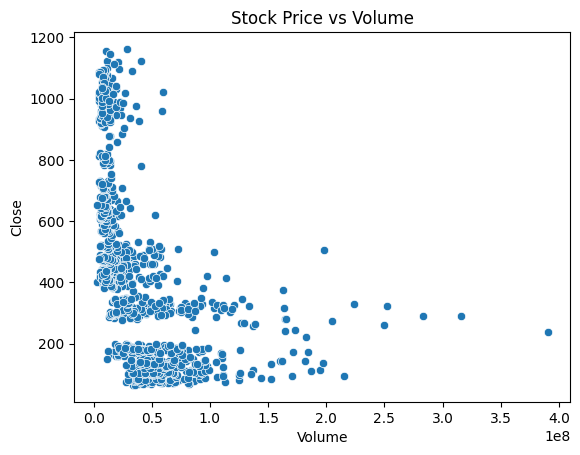

In [14]:
sns.scatterplot(x='Volume', y='Close', data=stock_data)
plt.title('Stock Price vs Volume')
plt.show()


**Time Series Analysis**: Forecasting Future Prices


**Autocorrelation Check**

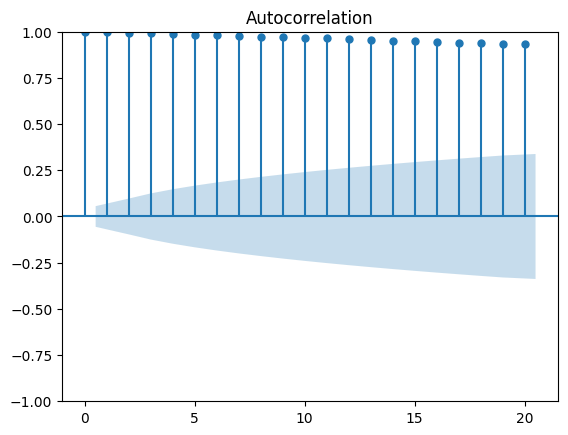

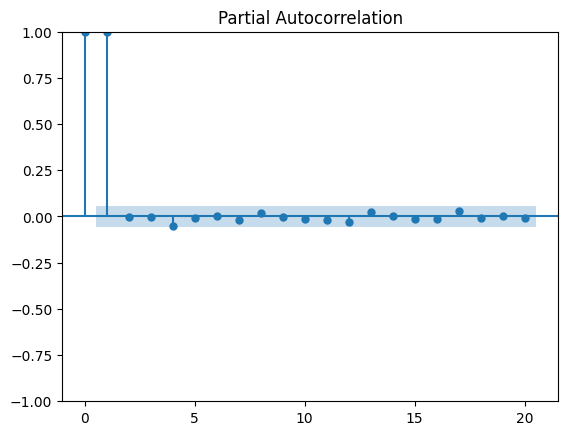

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data['Close'].dropna(), lags=20)
plot_pacf(stock_data['Close'].dropna(), lags=20)
plt.show()



**CONCLUSION**

The ACF plot suggests non-stationarity, meaning that the series likely needs differencing to remove the trend or make it stationary.
The PACF plot, with significant spikes at lag 1 and 2, points towards an AR(2) model, where the closing price depends on the previous two time points.
You might consider applying differencing to remove the trend and fitting an ARIMA model based on these patterns.

**ARIMA Model for Forecasting**

In [16]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(stock_data['Close'].dropna(), order=(5, 1, 0))
model_fit = model.fit()

In [17]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
1221,2024-09-09,1049.349976,1049.949951,1026.250000,1038.699951,1038.699951,7206054,-0.010149
1222,2024-09-10,1049.000000,1049.000000,1032.199951,1035.800049,1035.800049,6919238,-0.002792
1223,2024-09-11,1000.000000,1011.549988,971.250000,976.299988,976.299988,36140411,-0.057444
1224,2024-09-12,976.299988,988.000000,958.000000,986.150024,986.150024,25675836,0.010089
1225,2024-09-13,994.900024,1006.000000,988.000000,992.099976,992.099976,13203676,0.006034


In [17]:
forecast = model_fit.forecast(steps=30)
print(forecast)

1226    996.189093
1227    995.097616
1228    998.404282
1229    997.856153
1230    997.773727
1231    997.338362
1232    997.470322
1233    997.268613
1234    997.316416
1235    997.299650
1236    997.337500
1237    997.324682
1238    997.338616
1239    997.333795
1240    997.336469
1241    997.333349
1242    997.334556
1243    997.333481
1244    997.333961
1245    997.333668
1246    997.333925
1247    997.333812
1248    997.333901
1249    997.333855
1250    997.333883
1251    997.333862
1252    997.333873
1253    997.333865
1254    997.333869
1255    997.333866
Name: predicted_mean, dtype: float64


**CONCLUSION**

The ARIMA model's forecast for Tata Motors stock prices over the next 30 days suggests a stabilization around a value of approximately ₹997.33. After a slight fluctuation in the first few days, the predicted stock prices settle into a narrow range, indicating little expected movement in the near term. The values show minimal variance from the starting forecast of ₹996.18, reflecting a relatively stable trend without significant upward or downward shifts. This suggests that, based on historical data, Tata Motors stock may remain stable, with no major volatility anticipated over the forecast period. However, it's essential to note that external market factors and news events could still influence the actual stock price.